Привет! Меня зовут Александр Арасланов, я провожу ревью твоей работы. Предалагю общаться на «ты», если не против.

В работе ты увидишь комментарии, помеченные разным цветом.

<div class="alert alert-danger"> ❌
Красным цветом помечены моменты, которые необходимо доработать, чтобы проект был принят. Уверен, что у тебя все получится. Буду ждать твою работу на повторное ревью. 
</div>

<div class="alert alert-success"> ✅
Зеленым цветом помечены оброзцовые решения. Которые можно использовать в дальнейшем.
</div>

<div class="alert alert-warning"> ⚠️
Желтым цветом отмечено то, что ты можешь улучшить или доработать. Можешь учесть это при выполнении следующих работ или доработать проект сейчас, но это не обязательно.
</div>


Будет комфортнее работать над проектом вместе, если ты будешь **писать об изменениях** в проекте по моим рекомендациям. Для этого выбери для своих комментариев 

<div class="alert alert-block alert-info">заметный цвет</div>

Пожалуйста, **не перемещай, не изменяй и не удаляй мои комментарии**. Всё это поможет выполнить повторную проверку твоего проекта оперативнее.

## Исследование данных о российском кинопрокате



Цель данного задания:
- Предобработка данных
- Нахождение пропущенных значений и замена их
- Изучить значения файлы найти закономерности в данных (такие как наибольшая сумма финансирования либо наибольшее колличество выпущенных фильмов от года)

Обозначение столбцов в df:
- title — название фильма;
- puNumber — номер прокатного удостоверения;
- show_start_date — дата премьеры фильма;
- type — тип фильма;
- film_studio — студия-производитель;
- production_country — страна-производитель;
- director — режиссёр;
- producer — продюсер;
- age_restriction — возрастная категория;
- refundable_support — объём возвратных средств государственной поддержки;
- nonrefundable_support — объём невозвратных средств государственной поддержки;
- financing_source — источник государственного финансирования;
- budget — общий бюджет фильма;
- ratings — рейтинг фильма на КиноПоиске;
- genres — жанр фильма;
- puNumber — номер прокатного удостоверения;
- box_office — сборы в рублях.

### Шаг 1. Откройте файлы с данными и объедините их в один датафрейм. 

Объедините данные таким образом, чтобы все объекты из датасета `mkrf_movies` обязательно вошли в получившийся датафрейм. 

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_0" aria-expanded="false" aria-controls="collapseHint_0">Подсказка</button>
        </div>
        <div id="collapseHint_0" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Обратите внимание на тип данных столбца, по которому будете соединять датафреймы. Тип данных этих столбцов должен быть одинаковым в обоих датафреймах.
            </div>
        </div>
    </div>
</div>

<div class="alert alert-info"; style="border-left: 7px solid SteelBlue">
<h5>🎓 <font color="SteelBlue">Комментарий от студента (синий)</font></h5> 
В данном шаге будут подключены библиотеки и объеденены 2 датафрайма в один
    <div

In [1]:
# подключение библиотек
import pandas as pd
import os
import matplotlib.pyplot as plt 
import seaborn as se
pd.set_option('display.max_columns', 50)

In [2]:
pth1 = '/datasets/mkrf_movies.csv'
pth2 = 'mkrf_movies.csv'

if os.path.exists(pth1):
    df_movies = pd.read_csv(pth1)
elif os.path.exists(pth2):
    df_movies = pd.read_csv(pth2)
else:
    print('Incorrect file path')

In [3]:
pth1 = '/datasets/mkrf_shows.csv'
pth2 = 'mkrf_shows.csv'

if os.path.exists(pth1):
    df_shows = pd.read_csv(pth1)
elif os.path.exists(pth2):
    df_shows = pd.read_csv(pth2)
else:
    print('Incorrect file path')

In [4]:
#print(df_movies.head())
#print(df_shows.head())
#df_movies.info()
#df_shows.info()

# во время изменения типа данных столбца было замеченно что в столбце находится слово нет

df_movies.loc[df_movies['puNumber'] == 'нет', 'puNumber'] = 0
df_movies['puNumber'] = df_movies['puNumber'].astype('int')
df_movies.info() # было проверенно точто операция выполнена правильно
#display(df_movies.query('puNumber==0'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   int64  
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

In [5]:
df_united = df_movies.merge(df_shows,on='puNumber',how='left')
df_united.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   int64  
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

<div class="alert alert-success">

**✅Комментарий ревьюера**
Молодец, успешно импортировал библиотеки и получил основные сведения о данных  </div>

<div class="alert alert-info"; style="border-left: 7px solid SteelBlue">
<h5>🎓 <font color="SteelBlue">Комментарий от студента (синий)</font></h5> 
В данном шаге было найдено, то что в столбце puNumber, где должны указываться номер прокатного удостоверения, есть слово нет, оно было заменено на 0.
    <div

### Шаг 2. Предобработка данных

#### Шаг 2.1. Проверьте типы данных

- Проверьте типы данных в датафрейме и преобразуйте их там, где это необходимо.

In [6]:
display(df_united.head(5)) # по первым пяти можно увидить дубликаты по имени но разные номера паспортов

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN


<div class="alert alert-info"; style="border-left: 7px solid SteelBlue">
<h5>🎓 <font color="SteelBlue">Комментарий от студента (синий)</font></h5> 
все названия фильмов преобразовал к нижнему регистру, для проверки дубликатов явных,преобровано время и дата, были найдены значения в рейтинге которые являются не ясными  
    <div

<div class="alert alert-warning">

**⚠️Комментарий ревьюера**
Скорее всего это доли, которые преобразовали в проценты. Поэтому как вариант их можно было преобразовать в доли, а не заменять на пустые значения</div>

<div class="alert alert-info"; style="border-left: 7px solid SteelBlue">
<h5>🎓 <font color="SteelBlue">Комментарий от студента (синий)</font></h5> 
извиняюсь просто не понятно доля от чего? от всех просмотров, давольно не понятно от чего берутся процентов из-за этого не думаю что это надо как то менять  
    <div

In [7]:
df_united['title'] = df_united['title'].str.lower()

df_united['show_start_date'] = pd.to_datetime(df_united['show_start_date'])


#print(df_united['ratings'].unique())
rating = ['99%','28%','97%','83%','64%','91%','94%','62%','79%','90%','19%','88%','89%','98%']
df_united['ratings'] = df_united['ratings'].replace(rating , 'nan').astype(float)
#display(df_united.head(5).info())

#### Шаг 2.2. Изучите пропуски в датафрейме

- Объясните, почему заполнили пропуски определённым образом или почему не стали этого делать.

In [8]:
df_united.isna().sum()
#df_united.info()

title                       0
puNumber                    0
show_start_date             0
type                        0
film_studio                18
production_country          2
director                    9
producer                  568
age_restriction             0
refundable_support       7154
nonrefundable_support    7154
budget                   7154
financing_source         7154
ratings                   996
genres                    976
box_office               4328
dtype: int64

<div class="alert alert-info"; style="border-left: 7px solid SteelBlue">
<h5>🎓 <font color="SteelBlue">Комментарий от студента (синий)</font></h5> 
- Пропуски есть в студиях издательства (18), странна-производитель (2) [Можно загуглить], директор (9), продюсер (568), рейтинг (975) и жанров (976)
- Вторая же категория данных связана с бюджетом и возвратные и не возратные деньги правительству
    <div

In [9]:
#display(df_united[df_united['film_studio'].isna() == True])
num_film = [1293,4441,6105,6181,6485]
film = ['Biscuit Pictures','Первый канал','Pravda Films','Продюсерский центр «Молодёжные инициативы»',
       'Caravan Pictures' ]
df_united.loc[num_film, 'film_studio'] = film

<div class="alert alert-success">

**✅Комментарий ревьюера**
Молодец, что проявил любознательность и заполнил пропуски  </div>

In [10]:
#display(df_united[df_united['production_country'].isna() == True])
df_united.loc[df_united['production_country'].isna() == True , 'production_country'] = 'Россия'


In [11]:
#display(df_united[df_united['director'].isna() == True]) # указаны концерты заполнять нет смысла

<div class="alert alert-info"; style="border-left: 7px solid SteelBlue">
<h5>🎓 <font color="SteelBlue">Комментарий от студента (синий)</font></h5> 
В данном пункте заполнялись пропуски, у которых значений было не велико, такие как , студия, страна производитель, директор. Чаще всего неуказанные студии это либо невышедшие фильмы, либо не было студии, которая занималась этим или является авторской работой.
    <div

#### Шаг 2.3. Изучите дубликаты в датафрейме
- Проверьте, есть ли в данных дубликаты. Опишите причины, которые могли повлиять на появление дублей.

In [12]:
df_united.duplicated().sum() # явных дибликатов нет но,только изза столбца puNumber
print('Колличествво дубликатов в столбце puNumber: {}'.format(df_united['puNumber'].duplicated().sum()))
print('Колличествво дубликатов в столбце title: {}'.format(df_united['title'].duplicated().sum()))
#display(df_united[df_united['puNumber'].duplicated()])

Колличествво дубликатов в столбце puNumber: 2
Колличествво дубликатов в столбце title: 724


<div class="alert alert-info"; style="border-left: 7px solid SteelBlue">
<h5>🎓 <font color="SteelBlue">Комментарий от студента (синий)</font></h5> 
из данных можно обноружить что дубликатов по названию 714, но при этом паспортов дубликатов 2 , при этом фильмы с разным названием с чем это связано ? не ясно, а повтор по названию может быть связано с тем что фильм запускался несколько раз в прокат...
    <div

#### Шаг 2.4. Изучите категориальные значения

- Посмотрите, какая общая проблема встречается почти во всех категориальных столбцах;
- Исправьте проблемные значения в поле `type`.

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_1" aria-expanded="false" aria-controls="collapseHint_1">Подсказка</button>
        </div>
        <div id="collapseHint_1" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
В поле <code>type</code> есть несколько значений, у которых появился пробел в начале строки. Самый простой способ их «починить» -- использовать метод <a href="https://pandas.pydata.org/docs/reference/api/pandas.Series.str.strip.html#pandas.Series.str.strip">.str.strip</a>. Этот метод удаляет все пробелы, которые встречаются в начале и в конце строки. Применяют его таким образом:<br>
<code>df['type'].str.strip()</code>
            </div>
        </div>
    </div>
</div>

In [13]:
display(df_united['type'].value_counts())
df_united['type'] = df_united['type'].str.strip()

Художественный                4520
 Художественный               1389
Анимационный                   828
Прочие                         406
Документальный                 288
Научно-популярный               53
Музыкально-развлекательный       1
 Анимационный                    1
Name: type, dtype: int64

In [14]:
df_united['age_restriction'] = df_united['age_restriction'].str.strip()
df_united['age_restriction'].value_counts()

«16+» - для детей старше 16 лет           2851
«18+» - запрещено для детей               1605
«12+» - для детей старше 12 лет           1593
«0+» - для любой зрительской аудитории     811
«6+» - для детей старше 6 лет              626
Name: age_restriction, dtype: int64

<div class="alert alert-success">

**✅Комментарий ревьюера**
Успешно преобразовал категориальные признаки</div>

<div class="alert alert-info"; style="border-left: 7px solid SteelBlue">
<h5>🎓 <font color="SteelBlue">Комментарий от студента (синий)</font></h5> 
было исправлен тип выступления (убраны пробелы сначала и конца слов), данная операция была проведена и с возратной группой  
    <div

#### Шаг 2.5. Проверьте количественные значения

- Проверьте, обнаружились ли в таких столбцах подозрительные данные. Как с такими данными лучше поступить?

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_budget" aria-expanded="false" aria-controls="collapseHint_budget">Подсказка</button>
        </div>
        <div id="collapseHint_budget" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Обратите внимание на описание столбца <code>budget</code>. Как этот столбец соотносится с двумя другими: <code>refundable_support</code> и <code>nonrefundable_support</code>?
            </div>
        </div>
    </div>
</div>

<div class="alert alert-info"; style="border-left: 7px solid SteelBlue">
<h5>🎓 <font color="SteelBlue">Комментарий от студента (синий)</font></h5> 
    Первое, что хотелось проверить это данные столбцов [budget,refundable_support,nonrefundable_support] 
    <div

In [15]:
display(df_united[['budget','refundable_support','nonrefundable_support']].describe())
display(df_united[df_united['budget'] == 0].describe())
#df_united.query('(refundable_support + nonrefundable_support) > budget')

,budget,refundable_support,nonrefundable_support
count,3.320000e+02,3.320000e+02,3.320000e+02
mean,1.272297e+08,1.186446e+07,4.898099e+07
std,1.885883e+08,2.491656e+07,5.998012e+07
min,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.200000e+07,0.000000e+00,2.500000e+07
50%,6.864992e+07,0.000000e+00,3.000000e+07
75%,1.419853e+08,1.500000e+07,4.037500e+07
max,2.305074e+09,1.800000e+08,4.000000e+08


,puNumber,refundable_support,nonrefundable_support,budget,ratings,box_office
count,1.700000e+01,1.700000e+01,1.700000e+01,17.0,16.000000,1.700000e+01
mean,1.120672e+08,1.670588e+07,6.517467e+07,0.0,5.725000,1.631373e+08
std,1.473501e+06,2.006478e+07,6.123620e+07,0.0,0.916151,2.511160e+08
min,1.110004e+08,0.000000e+00,0.000000e+00,0.0,4.300000,1.334699e+06
25%,1.110096e+08,0.000000e+00,2.300000e+07,0.0,5.075000,5.045195e+07
50%,1.110173e+08,1.000000e+07,5.100000e+07,0.0,5.700000,7.293778e+07
75%,1.140017e+08,2.000000e+07,7.500000e+07,0.0,6.300000,1.844876e+08
max,1.140065e+08,6.000000e+07,2.500000e+08,0.0,7.800000,1.038321e+09


<div class="alert alert-info"; style="border-left: 7px solid SteelBlue">
<h5>🎓 <font color="SteelBlue">Комментарий от студента (синий)</font></h5> 
- Из столбцов budget, refundable_support, nonrefundable_support видно что, минимум составляет 0 рублей, Мединное значение refundable_support	равно 0 рублей 
- После заинтересовали Фильмы с нулевым бюджетом по рейтингу имеют минимум 4.3 и максимум 7.8, а также видно что поддеркжка была выделена, значит надо исправит значение бюджета как сумма двух столбцов (всего таких фильмов 17)
    <div

In [16]:
def budget(df):
    if df['budget'] < (df['refundable_support'] + df['nonrefundable_support']):
        return df['refundable_support'] + df['nonrefundable_support']
    else:
        return df['budget']

df_united['budget'] = df_united.apply(budget, axis=1)
df_united.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   title                  7486 non-null   object             
 1   puNumber               7486 non-null   int64              
 2   show_start_date        7486 non-null   datetime64[ns, UTC]
 3   type                   7486 non-null   object             
 4   film_studio            7473 non-null   object             
 5   production_country     7486 non-null   object             
 6   director               7477 non-null   object             
 7   producer               6918 non-null   object             
 8   age_restriction        7486 non-null   object             
 9   refundable_support     332 non-null    float64            
 10  nonrefundable_support  332 non-null    float64            
 11  budget                 332 non-null    float64          

<div class="alert alert-success">

**✅Комментарий ревьюера**
Хорошая функция </div>

<div class="alert alert-info"; style="border-left: 7px solid SteelBlue">
<h5>🎓 <font color="SteelBlue">Комментарий от студента (синий)</font></h5> 
была написана функция по изменению значений в столбце 'budget', там где значение бюджета =0 но поддержка составляет более 0
    <div

#### Шаг 2.6. Добавьте новые столбцы





- Создайте столбец с информацией о годе проката. Выделите год из даты премьеры фильма.

In [17]:
df_united['years'] = df_united['show_start_date'].dt.year

- Создайте два столбца: с именем и фамилией главного режиссёра и основным жанром фильма. В столбцы войдут первые значения из списка режиссёров и жанров соответственно.

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_2" aria-expanded="false" aria-controls="collapseHint_2">Подсказка</button>
        </div>
        <div id="collapseHint_2" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Чтобы создать такие столбцы, лучше всего использовать собственную функцию. Эту функцию можно применить к двум столбцам сразу. 
            </div>
        </div>
    </div>
</div>

In [18]:
def two_column_first (df=df_united,row_1='director',row_2='genres',name_column_1='director_first',name_column_2='genre_first'):
    df[name_column_1] = df[row_1].str.split(",").str[0]
    df[name_column_2] = df[row_2].str.split(",").str[0]
two_column_first()

#display(df_united.head())


- Посчитайте, какую долю от общего бюджета фильма составляет государственная поддержка.

In [19]:
df_united['budget share'] = (df_united['refundable_support']+df_united['nonrefundable_support'])/df_united['budget']
#print(df_united['budget share'].unique())

<div class="alert alert-info"; style="border-left: 7px solid SteelBlue">
<h5>🎓 <font color="SteelBlue">Комментарий от студента (синий)</font></h5> 
Вданном шаге была проделана работа:
- проверены и исправлены типы данных в столбцах
- изучены пропуски в датафрайме
- изучены дубликаты
- проверены категориальные и колличественные значения 
- добавлены три столбца
    <div

<div class="alert alert-success">

**✅Комментарий ревьюера**
Успешно добавил новые поля, молодец</div>

### Шаг 3. Проведите исследовательский анализ данных


- Посмотрите, сколько фильмов выходило в прокат каждый год. Обратите внимание, что данные о прокате в кинотеатрах известны не для всех фильмов. Посчитайте, какую долю составляют фильмы с указанной информацией о прокате в кинотеатрах.

In [20]:
#display(df_united.groupby('years')['box_office'].count().sum())
pivot_year_movie = df_united.groupby(['years'])['title'].count().reset_index()
pivot_year_movie

,years,title
0,2010,985
1,2011,622
2,2012,593
3,2013,630
4,2014,807
5,2015,705
6,2016,818
7,2017,505
8,2018,891
9,2019,930


<div class="alert alert-danger">

**❌Комментарий ревьюера**
Смотри, из-за того, что ты для подсчета используешь поле `box_office`, в котором есть пропуски, то количество записей у тебя сокращается сильно. Здесь ты в итоге получаешь не кол-во фильмов, которые выходило каждый год, а кол-во фильмов по которым у тебя есть данные о сборах. Но в прокат у нас выходило больше фильмов, просто данные о сборах есть не по всем

Лучше после группировки взять два поля, например, 'title', 'box_office' и применить `count` к ним. Так ты получишь кол-во фильмов в прокате, кол-во фильмов со сборами. Поделишь и найдешь долю. Оба графика ниже и выводы соответственно тоже нужно будет подправить</div>

<div class="alert alert-info"; style="border-left: 7px solid SteelBlue">
<h5>🎓 <font color="SteelBlue">Комментарий от студента (синий)</font></h5> 
Честно там повторы встречаются фильмов, я думаю может сгрупировать по title так как фильм один а выходил не сколько раз в кино 
    <div

<div class="alert alert-success">

**✅Комментарий ревьюера  V2**
Исправления принял. Что касается твоего вопроса, то суть в том, что нас интересует кол-во прокатов. А не кол-во уникальных фильмов в прокате. Поэтому то что имеются дубликаты, это не страшно. Каждый прокат был в разные даты, имеет свои собственные сборы</div>

<div class="alert alert-info"; style="border-left: 7px solid SteelBlue">
<h5>🎓 <font color="SteelBlue">Комментарий от студента (синий)</font></h5> 
- В данной таблице указано колличество фильмов вышедвих в кинотеатрах (и не только)
    <div

In [21]:
pivot_year_procent = (df_united[['years','box_office']]
                      .groupby('years')
                      .apply(lambda x : x['box_office'].apply(pd.notna).mean())*100)
pivot_year_procent=(pivot_year_procent
                    .to_frame()
                    .reset_index())
pivot_year_procent.rename(columns={0:'procent_movies'},inplace=True)
display(pivot_year_procent)

,years,procent_movies
0,2010,10.659898
1,2011,17.524116
2,2012,21.585160
3,2013,29.206349
4,2014,34.572491
5,2015,65.957447
6,2016,64.303178
7,2017,70.693069
8,2018,53.310887
9,2019,56.989247


<div class="alert alert-info"; style="border-left: 7px solid SteelBlue">
<h5>🎓 <font color="SteelBlue">Комментарий от студента (синий)</font></h5> 
- В данной таблице указано колличество фильмов показанные в кинотеатрах ( и не только как я понял понял из гугла эта фильмы которые еще транслипровались на тв и т.д)
    <div

<div class="alert alert-danger">

**❌Комментарий ревьюера  V2**
Код упал с ошибкой KeyError: 'box_office' После внесенных исправлений</div>

<div class="alert alert-info"; style="border-left: 7px solid SteelBlue">
<h5>🎓 <font color="SteelBlue">Комментарий от студента (синий) V3</font></h5> 
Исправил, нашёл, что забыл поправить ось y и указать title  а не box_office
    <div

<div class="alert alert-success">

**✅Комментарий ревьюера  V3**
Исправления принял</div>

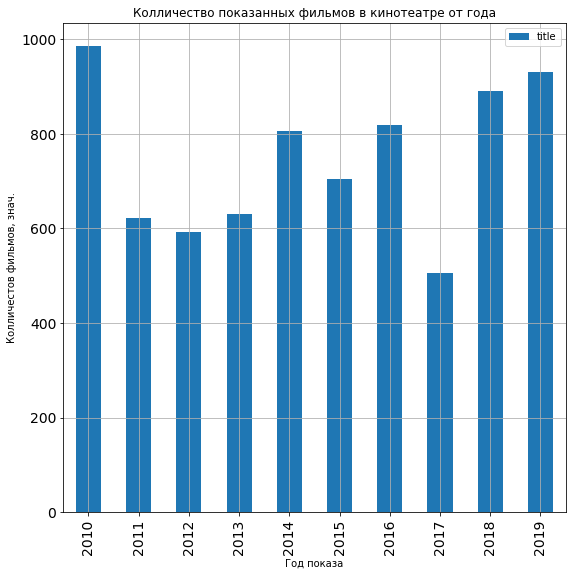

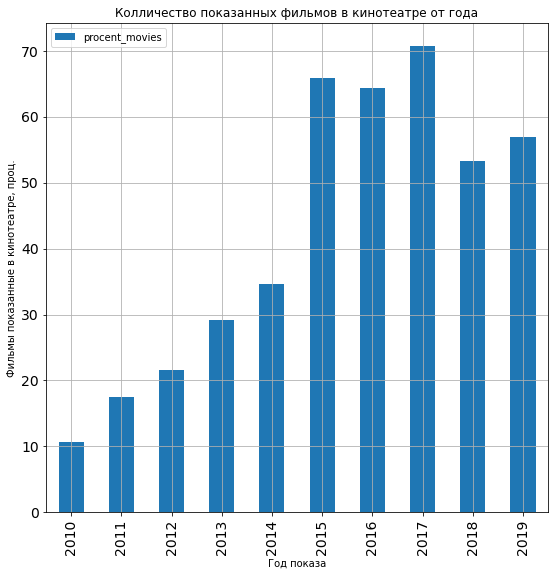

In [22]:
pivot_year_movie.plot(kind='bar',figsize = (9,9),
                      title='Колличество показанных фильмов в кинотеатре от года',
                      grid=True, legend=True,
                      xlabel='Год показа',ylabel='Колличестов фильмов, знач.',
                      fontsize = 14, x ='years', y='title')
plt.show()
pivot_year_procent.plot(kind='bar',figsize = (9,9),
                        title='Колличество показанных фильмов в кинотеатре от года',
                        grid=True, legend=True,
                        xlabel='Год показа',ylabel='Фильмы показанные в кинотеатре, проц.',
                        fontsize = 14, x ='years', y = 'procent_movies')
plt.show()

In [23]:
piv_united=pivot_year_movie.merge(pivot_year_procent,how='left',on='years')
display(piv_united.corr())

,years,title,procent_movies
years,1.000000,0.160854,0.865056
title,0.160854,1.000000,-0.068461
procent_movies,0.865056,-0.068461,1.000000


,max_office,min_office
years,,
2010,1.446400e+06,75.0
2011,1.161808e+07,125.0
2012,2.311220e+06,80.0
2013,1.995703e+07,40.0
2014,1.016411e+09,50.0
2015,1.658861e+09,100.0
2016,2.048126e+09,200.0
2017,2.779686e+09,7900.0
2018,2.271754e+09,41225.0


array([<AxesSubplot:xlabel='Год показа', ylabel='Сумма сборов, руб.'>,
       <AxesSubplot:xlabel='Год показа', ylabel='Сумма сборов, руб.'>],
      dtype=object)

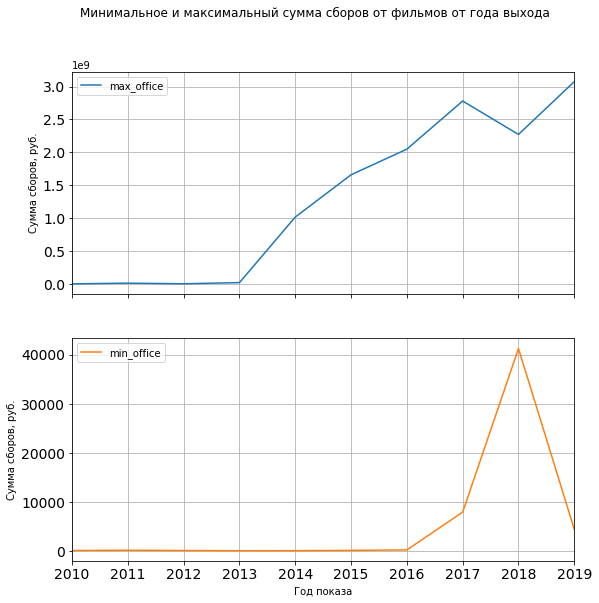

In [24]:
pivot_year_movie = (df_united
                    .query('box_office > 0')
                    .pivot_table(index='years',values='box_office',aggfunc=['max','min']))
pivot_year_movie.columns=['max_office','min_office']

display(pivot_year_movie)
pivot_year_movie.plot(kind='line',figsize = (9,9),subplots=True,
                       title='Минимальное и максимальный сумма сборов от фильмов от года выхода',
                       grid=True, legend=True,
                       xlabel='Год показа',ylabel='Сумма сборов, руб.',
                       fontsize = 14, xlim=(2010,2019))

<div class="alert alert-info"; style="border-left: 7px solid SteelBlue">
<h5>🎓 <font color="SteelBlue">Комментарий от студента (синий)</font></h5> 
Весьма высокую корелляцию можно пронаблюдать года выхода фильма и сборов. а так же можно увидеть чем выше процент вышедших фильмов в кинотеатре тем больше сборы (как не странно) :)
    <div

<div class="alert alert-danger">

**❌Комментарий ревьюера**
Не увидел у тебя ответа на вопрос:

`Изучите, как менялась динамика проката по годам. В каком году сумма сборов была минимальной? А максимальной?`</div>


<div class="alert alert-danger">

**❌Комментарий ревьюера V2**
Забыл исключить фильмы с 0 сборами или без сборов</div>


<div class="alert alert-info"; style="border-left: 7px solid SteelBlue">
<h5>🎓 <font color="SteelBlue">Комментарий от студента (синий) V3 </font></h5>
    Исправил добавил фильтр по сборам чтобы был больше 0
    <div

<div class="alert alert-success">

**✅Комментарий ревьюера  V3**
Исправления принял</div>

<div class="alert alert-info"; style="border-left: 7px solid SteelBlue">
<h5>🎓 <font color="SteelBlue">Комментарий от студента (синий)</font></h5> 
из таблицы видно минимальная сумма сборов  в 2013 году 40 рублей
    А максимальная сумма выручки начинает свой рост с 2013 года, как раз когда начинается выпускаться большое колличество фильмов в прокат, максимальная сумма выручки была в 2019 году
    <div

- С помощью сводной таблицы посчитайте среднюю и медианную сумму сборов для каждого года.

<div class="alert alert-warning">

**⚠️Комментарий ревьюера**
Можно к датафрейму применить метод `round()`, чтобы убрать экспоненциальну запись числа</div>

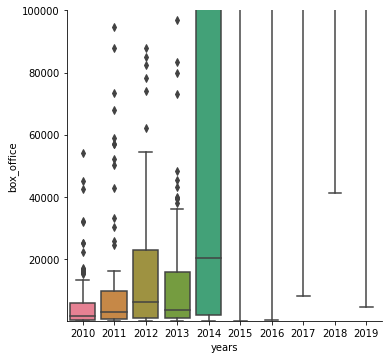

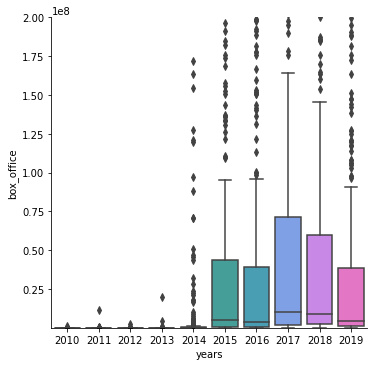

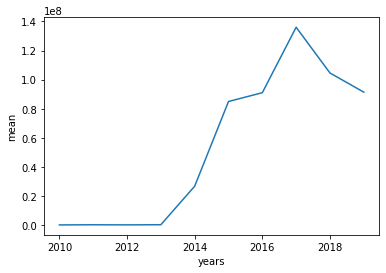

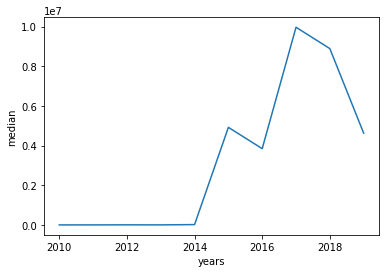

<AxesSubplot:ylabel='Рубли'>

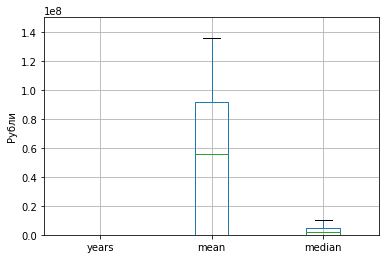

In [25]:
pivot_year_movie = (df_united.query('box_office > 10'))
#piv_tab_mean_year = df_united.pivot_table(index='years',values='box_office',aggfunc=['mean','median']).round().reset_index()
#piv_tab_mean_year.columns=['years','mean','median']
#display(piv_tab_mean_year)
#piv_tab_mean_year.plot(kind='box',figsize = (9,9),subplots=True,
                       #title='Медианное и среднее значение сборов фильмов',
                       #grid=True, legend=True,
                       #xlabel='Год показа',ylabel='Зарабаток, руб.',
                       #fontsize = 14,)
#display(pivot_year_movie)
se.catplot(x='years', y='box_office', kind="box", data=pivot_year_movie , palette='husl')
plt.ylim(50,1*10*10**4)

se.catplot(x='years', y='box_office', kind="box", data=pivot_year_movie , palette='husl')
plt.ylim(1*10*10**4,2*10*10**7)
plt.show()


varian_2 = df_united.groupby('years')['box_office'].agg(['mean', 'median']).reset_index()
#display(varian_2)
for col in ['mean','median']:
    se.lineplot(data=varian_2, x='years',palette='husl',y=col)
    plt.show()
#se.lineplot(data=varian_2)
#plt.xlim(2010)
#plt.ylim(0)
varian_2.plot(kind='box',grid=True, label='Среднее и медианное значение по всем годам', ylabel='Рубли',ylim=(0,1.5*10**8))

- Определите, влияет ли возрастное ограничение аудитории («6+», «12+», «16+», «18+» и т. д.) на сборы фильма в прокате в период с 2015 по 2019 год? Фильмы с каким возрастным ограничением собрали больше всего денег в прокате? Меняется ли картина в зависимости от года? Если да, предположите, с чем это может быть связано.

<div class="alert alert-info"; style="border-left: 7px solid SteelBlue">
<h5>🎓 <font color="SteelBlue">Комментарий от студента (синий)</font></h5> 
По построиным боксплотам можно увидеть то что среднее значения заработков фильма находится на уровне 0,57*10**8, а медианное значение находится на уровне 0,195*10**7, связано с тем что в определенные года было выпущено меньше фильмов (например с 2010 по 2013 год)
    <div

<div class="alert alert-info"; style="border-left: 7px solid SteelBlue">
<h5>🎓 <font color="SteelBlue">Комментарий от студента (синий) V3 </font></h5> 
Минимальное значение по сборамм составляет 40 рублей а максимально 41 тысяча рублей, Максимально значение принадлежит 2019 году
    Среднее значения заработка с 2010 по 2019 это 0,57*10**8 рублей, медианное значение лежит куда ниже 1.99*10**6 рублей
    <div

<div class="alert alert-danger">

**❌Комментарий ревьюера**
Лучше смотреть не на сумму сборов, потому что чем больше фильмов, тем может быть и больше сумма сборов. А на распрделеения (можно построить боксплоты) или на среднее значение</div>

<div class="alert alert-danger">

**❌Комментарий ревьюера V2**
Не увидел исправлений</div>


<div class="alert alert-info"; style="border-left: 7px solid SteelBlue">
<h5>🎓 <font color="SteelBlue">Комментарий от студента (синий) V4 </font></h5> 
ааааааааааа замечания были к группе, а то я исправлял пункт выше 
    <div

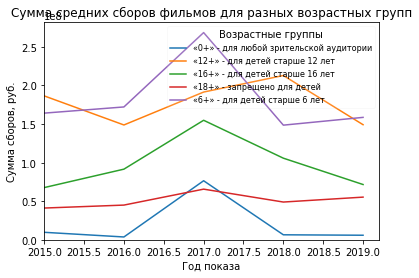

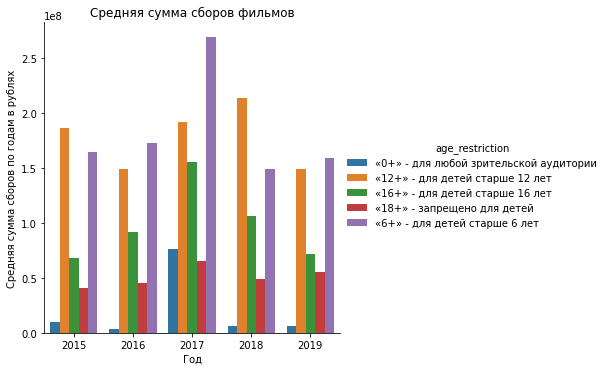

In [26]:
age_mov_year = df_united.query('2015<=years').groupby(['years','age_restriction'])['box_office'].mean().reset_index().round()
fig = se.lineplot(x='years', y='box_office', hue='age_restriction', data=age_mov_year,markers=True, dashes=False)
plt.title('Сумма средних сборов фильмов для разных возрастных групп')
plt.xlabel('Год показа')
plt.ylabel('Сумма сборов, руб.')
plt.figsize=(2,1)
plt.xlim(2015)
plt.ylim(0)
plt.legend(fontsize=8, framealpha=0.1,title='Возрастные группы')
plt.show()

age_mov_year = (df_united
                .query('2015 <= years')
                .groupby(['years', 'age_restriction'])['box_office']
                .agg('mean')
                .reset_index())
fig = se.catplot(x='years', y='box_office', hue='age_restriction', data=age_mov_year, kind='bar')
plt.title('Средняя сумма сборов фильмов')
plt.xlabel('Год')
plt.ylabel('Средняя сумма сборов по годам в рублях')
plt.show()

По построеенным графикам можно сказать:
- наибольшее количестов фильмов вышло в 2019 и в 2016 годах
- при этом доля прокатов в фильме наибольше составляет в 2017 году
- Из медианного и среднего знчения сборов фильмов видно, что с 2010 по 2013 год значение имеет наименьше значения связано с тем, что колличество фильмов составляло меньшее значение, по сравнению с годами выше 
-  Так же можно заметить, что в 2017 году среднее число собранных денег вызвана фильмами и передачам, которая имеет возростной рейтинг 6+

### Шаг 4. Исследуйте фильмы, которые получили государственную поддержку

На этом этапе нет конкретных инструкций и заданий — поищите интересные закономерности в данных. Посмотрите, сколько выделяют средств на поддержку кино. Проверьте, хорошо ли окупаются такие фильмы, какой у них рейтинг.

<div class="alert alert-info"; style="border-left: 7px solid SteelBlue">
<h5>🎓 <font color="SteelBlue">Комментарий от студента (синий)</font></h5> 
Создана копия ДФ для знечий у которых есть бюджет
    <div

In [27]:
#gos_sup = df_united.query('production_country == "Россия" & budget>= 0')
gos_sup = df_united[df_united['budget'].isna() == False].copy()
gos_sup['summa_support'] = gos_sup['refundable_support']+gos_sup['nonrefundable_support']
gos_sup['income'] = gos_sup['box_office']-gos_sup['budget']
display(gos_sup.head())

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,years,director_first,genre_first,budget share,summa_support,income
1281,пока еще жива,111005313,2013-10-11 12:00:00+00:00,Художественный,"АНО содействия развитию кинематографии ""Ангел-...",Россия,А.Атанесян,"А.Атанесян, М.Бабаханов, Р.Бутко",«16+» - для детей старше 16 лет,0.0,26500000.0,79411900.0,Министерство культуры,8.1,"драма,мелодрама",365353.6,2013,А.Атанесян,драма,0.333703,26500000.0,-79046546.4
1448,бесславные придурки,111003314,2014-03-28 12:00:00+00:00,Художественный,"ООО ""Компания ""АТК-Студио""",Россия,А.Якимчук,А.Тютрюмов,«12+» - для детей старше 12 лет,0.0,26000000.0,37142857.0,Министерство культуры,NaN,NaN,28140.0,2014,А.Якимчук,NaN,0.700000,26000000.0,-37114717.0
1498,невидимки,111004213,2013-09-10 12:00:00+00:00,Художественный,"ООО ""Компания ""РЕАЛ-ДАКОТА""",Россия,"Р.Давлетьяров, С.Комаров","Р.Давлетьяров, А.Котелевский, А.Олейников",«12+» - для детей старше 12 лет,0.0,107847945.0,176023490.0,Фонд кино,5.3,"комедия,фантастика",19957031.5,2013,Р.Давлетьяров,комедия,0.612691,107847945.0,-156066458.5
1524,берцы,111004314,2014-05-05 12:00:00+00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,Е.Миндадзе (псевдоним Катя Шагалова),Л.Антонова,«16+» - для детей старше 16 лет,0.0,28000000.0,40574140.0,Министерство культуры,4.2,драма,55917.5,2014,Е.Миндадзе (псевдоним Катя Шагалова),драма,0.690095,28000000.0,-40518222.5
1792,братья ч,111004414,2014-04-23 12:00:00+00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,М.Угаров,"А.Миндадзе, Л.Антонова",«16+» - для детей старше 16 лет,0.0,25000000.0,40015122.0,Министерство культуры,6.4,драма,232100.0,2014,М.Угаров,драма,0.624764,25000000.0,-39783022.0


In [28]:
#display(gos_sup.groupby('years')['puNumber'].count()) # 2013 и 2014 видно только начиналось финансирование
gos_sup = gos_sup[gos_sup['years']>2014]

Text(0, 0.5, 'Значение, руб.')

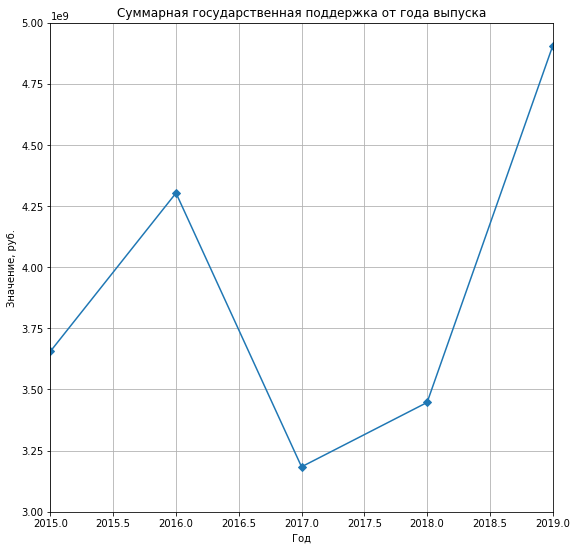

In [29]:
(gos_sup
 .groupby('years')['summa_support'].agg('sum')
 .plot(grid=True, ylim=(3*10**9,5*10**9), style='-D', figsize=(9,9),xlim=(2015,2019)))
plt.title('Суммарная государственная поддержка от года выпуска')
plt.xlabel('Год')
plt.ylabel('Значение, руб.')

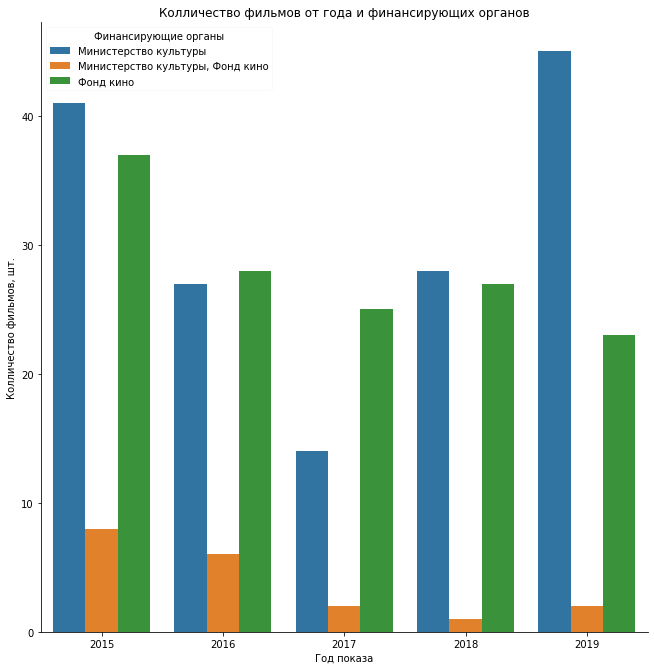

In [30]:
source = gos_sup.groupby(['financing_source','years'])['puNumber'].count().reset_index()
fig = se.catplot(x='years', y='puNumber', hue='financing_source', data=source, kind='bar',height=9, aspect =1, legend =False)
plt.title('Колличество фильмов от года и финансирующих органов')
plt.xlabel('Год показа')
plt.ylabel('Колличество фильмов, шт.')
plt.legend(fontsize=10, framealpha=0.1,title='Финансирующие органы')

<div class="alert alert-success">

**✅Комментарий ревьюера**
Здесь все сделал хорошо, молодец</div>

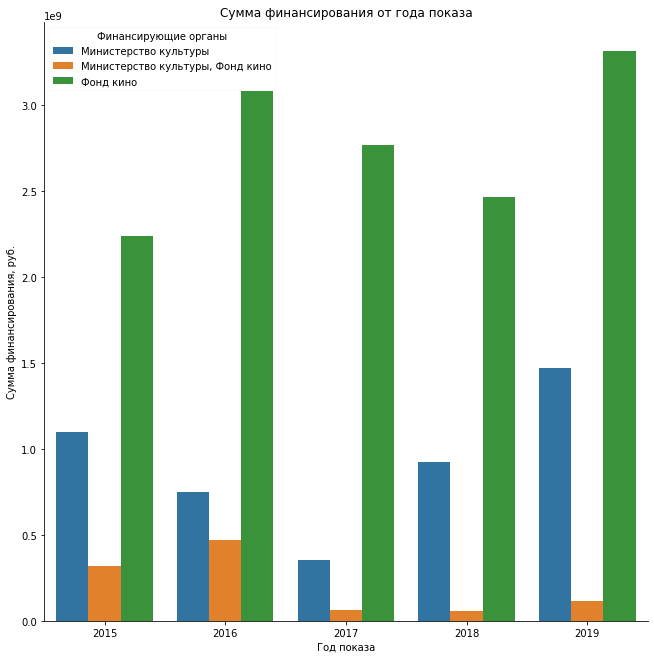

In [31]:
finance = gos_sup.groupby(['financing_source','years'])['summa_support'].sum().reset_index()
fig = se.catplot(x='years', y='summa_support', hue='financing_source', data=finance, kind='bar',height=9, aspect =1, legend =False)
plt.title('Сумма финансирования от года показа')
plt.xlabel('Год показа')
plt.ylabel('Сумма финансирования, руб.')
plt.legend(fontsize=10, framealpha=0.1,title='Финансирующие органы') 

(5.0, 7.9799999999999995)

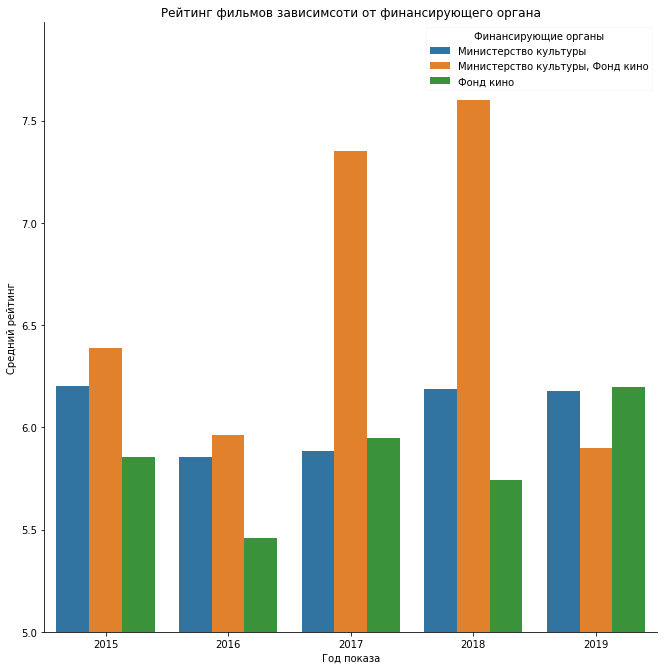

In [32]:
rating = gos_sup.groupby(['financing_source','years'])['ratings'].mean().reset_index()
fig = se.catplot(x='years', y='ratings', hue='financing_source', data=rating, kind='bar',height=9, aspect =1, legend =False)
plt.title('Рейтинг фильмов зависимсоти от финансирующего органа')
plt.xlabel('Год показа')
plt.ylabel('Средний рейтинг')
plt.legend(fontsize=10, framealpha=0.1,title='Финансирующие органы')
plt.ylim(5)

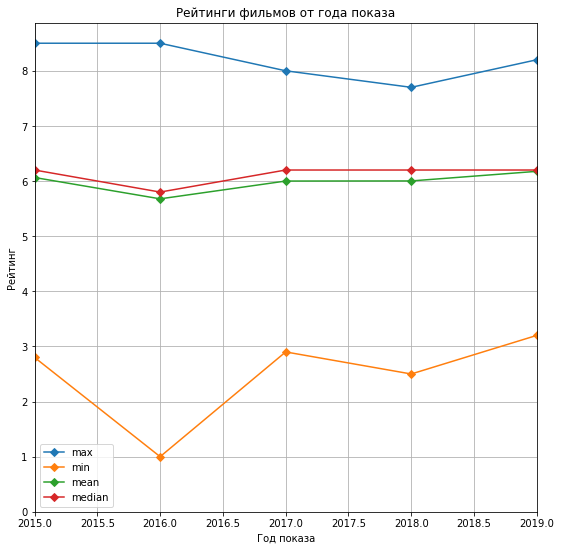

In [33]:
(gos_sup
 .groupby('years')['ratings']
 .agg(['max', 'min', 'mean', 'median'])
 .plot(grid=True, ylim=0, style='D-' ,figsize=(9,9),xlim=(2015,2019)))
plt.title('Рейтинги фильмов от года показа');
plt.xlabel('Год показа');
plt.ylabel('Рейтинг');

<AxesSubplot:>

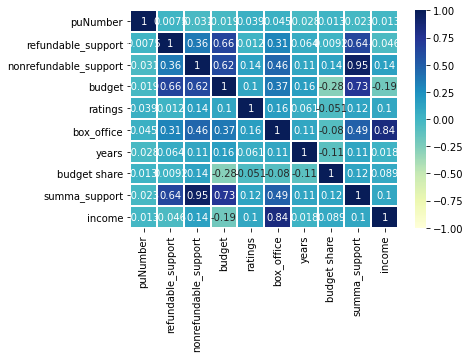

In [34]:
se.heatmap(gos_sup.corr(),vmin=-1, vmax=1,annot = True,center= 0, linewidths=1,cmap="YlGnBu")
#plt.figure(figsize=(10, 10))

<div class="alert alert-info"; style="border-left: 7px solid SteelBlue">
<h5>🎓 <font color="SteelBlue">Комментарий от студента (синий)</font></h5> 
Из графика выше можно заметить, что box_office имеет умереную прямую корелляцию со столбцом budjet, а также высокаю с заработаными деньгами, наибольшую прямую корелляцию имеет значение summa_support от nonrefundable_support
    <div

<div class="alert alert-info"; style="border-left: 7px solid SteelBlue">
<h5>🎓 <font color="SteelBlue">Комментарий от студента (синий)</font></h5> 
была найден то 10 жанров фильмов, которые чаще всего показывают в кинотеатре, это оказалась драма (жизнь моя драма), но наибольшее финансирование имеют фильмы жанра фантастика( видно из-за спец эфектов и компютерной графики)
    <div

In [35]:
top_genre = (gos_sup
             .groupby('genre_first')['summa_support']
             .agg(['mean','max','min','count'])
             .sort_values(by='count',ascending=False)
             .head(10)
             .reset_index())
display(top_genre)

,genre_first,mean,max,min,count
0,драма,5.904593e+07,450000000.0,4700000.0,85
1,комедия,4.299204e+07,120000000.0,5000000.0,71
2,мультфильм,7.971733e+07,200000000.0,11520000.0,30
3,триллер,5.130969e+07,150000000.0,20000000.0,15
4,мелодрама,2.692308e+07,35000000.0,8000000.0,13
5,фэнтези,9.390000e+07,300000000.0,25000000.0,11
6,ужасы,3.550000e+07,66000000.0,25000000.0,10
7,фантастика,1.381000e+08,500000000.0,6000000.0,10
8,военный,4.688899e+07,80000866.0,30000000.0,9
9,приключения,9.942857e+07,270000000.0,6000000.0,7


<div class="alert alert-info"; style="border-left: 7px solid SteelBlue">
<h5>🎓 <font color="SteelBlue">Комментарий от студента (синий)</font></h5> 
Был определен руководитель (режисер), у которого наибольшее колличество картин за этот период, которые выходили в кино и финансировались
<div

In [36]:
top_director_movie = (gos_sup
                      .groupby('director_first')['puNumber']
                      .agg(['count'])
                      .sort_values(by='count',ascending=False)
                      .head(10)
                      .reset_index())
display(top_director_movie)

,director_first,count
0,Р.Давлетьяров,4
1,Д.Дьяченко,4
2,С.Андреасян,4
3,А.Котт,3
4,Н.Хомерики,3
5,А.Аксененко,3
6,Д.Шмидт,3
7,С.Мокрицкий,3
8,Ф.Дмитриев,2
9,Р.Каримов,2


<div class="alert alert-info"; style="border-left: 7px solid SteelBlue">
<h5>🎓 <font color="SteelBlue">Комментарий от студента (синий)</font></h5> 
К.Шипенко, картины данного режиссера являются наиболее прибыльными хотя их всего 2,
    <div

<div class="alert alert-success">

**✅Комментарий ревьюера**
Интересное решение показать окупаемость для режиссеров. Мне кажется окупаемость для фондов быо бы важнее показать</div>

,director_first,mean,median,sum,count
0,К.Шипенко,1.586257e+09,1.586257e+09,3.172515e+09,2
1,А.Мегердичев,2.189494e+09,2.189494e+09,2.189494e+09,1
2,А.Сидоров,1.707969e+09,1.707969e+09,1.707969e+09,1
3,Д.Дьяченко,4.060508e+08,1.548375e+08,1.624203e+09,4
4,О.Трофим,1.297147e+09,1.297147e+09,1.297147e+09,1
5,Ф.Бондарчук,7.883215e+08,7.883215e+08,7.883215e+08,1
6,Н.Лебедев,7.669715e+08,7.669715e+08,7.669715e+08,1
7,Д.Шмидт,2.327708e+08,3.110692e+08,6.983123e+08,3
8,Д.Киселев,3.484797e+08,3.484797e+08,6.969594e+08,2
9,Т.Бекмамбетов,3.075187e+08,3.075187e+08,6.150375e+08,2


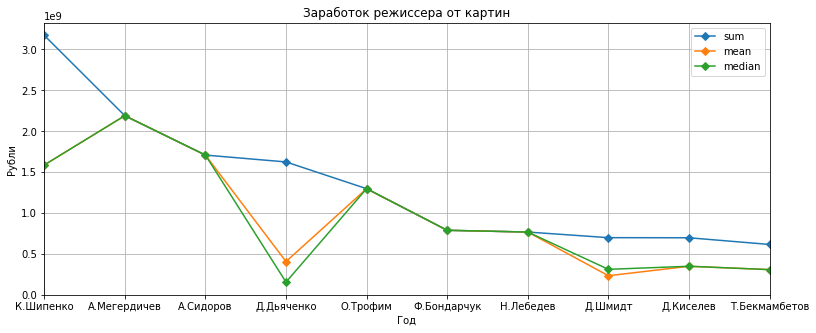

In [37]:
top_director_income = (gos_sup
                    .groupby('director_first')['income']
                    .agg(['mean','median','sum','count'])
                    .sort_values(by='sum',ascending=False)
                    .head(10)
                    .reset_index())
top_director_income.plot(grid=True, ylim=0, style='D-', y =['sum','mean','median'],figsize=(13,5),xlim=(0,9),x='director_first')
plt.title('Заработок режиссера от картин');
plt.xlabel('Год');
plt.ylabel('Рубли');
display(top_director_income)


,director_first,mean,max
0,К.Шипенко,1.913124e+09,3.073569e+09
1,А.Мегердичев,2.779686e+09,2.779686e+09
2,А.Сидоров,2.271754e+09,2.271754e+09
3,Д.Дьяченко,6.012247e+08,1.655038e+09
4,О.Трофим,1.445732e+09,1.445732e+09
5,Н.Лебедев,1.402255e+09,1.402255e+09
6,Ф.Бондарчук,1.038321e+09,1.038321e+09
7,Д.Киселев,6.998917e+08,8.554511e+08
8,Д.Козловский,8.205280e+08,8.205280e+08
9,К.Феоктистов,7.592268e+08,7.592268e+08


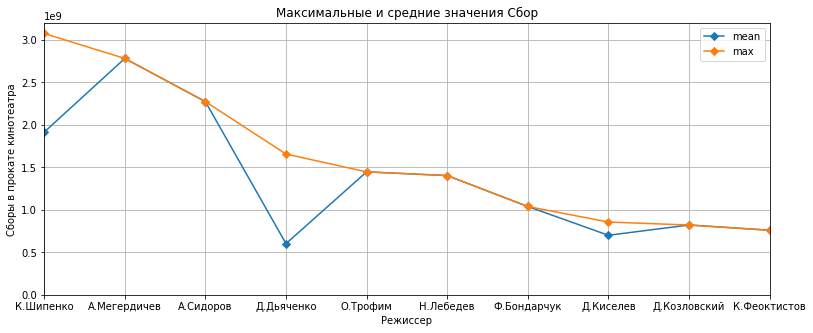

In [38]:
#pivot_sup_inc = ((gos_sup.
#                 pivot_table(index='director_first',values=['box_office'],aggfunc=['mean','max']))
#                 .reset_index()
#                 .head(10))

#pivot_sup_inc.columns = ['director','mean_box_office','max_office']
#pivot_sup_inc.sort_values(by='max_office')

#display(pivot_sup_inc)
#pivot_sup_inc.plot(grid=True, ylim=0, style='D-', y =['mean_box_office','max_office'],figsize=(13,5),xlim=(0,9),x='director')
#plt.xlabel('Режиссер')
#plt.ylabel('Сборы в прокате кинотеатра')
#plt.title('Максимальные и средние значения Сборов')

top_director_box_office = (gos_sup
                       .groupby('director_first')['box_office']
                       .agg(['mean','max'])
                       .sort_values(by='max',ascending=False)
                       .head(10)
                       .reset_index())
top_director_box_office.plot(grid=True, ylim=0, style='D-', y =['mean','max'],figsize=(13,5),xlim=(0,9),x='director_first')
plt.xlabel('Режиссер')
plt.ylabel('Сборы в прокате кинотеатра')
plt.title('Максимальные и средние значения Сбор')
display(top_director_box_office)

### Шаг 5. Напишите общий вывод

1. В данном проекте были исправлены и найдены
- Соеденны две таблицы
- Исправлены даты отображения
- Исправлены значения в бюджеты
- Так же исправлены значения в pyNumber
- Добавлены новые столбцы для лучшей обработки данных
- исправлены значения в колонке type
- Пропущены значения режисера и студии (предполагается что делался этот фильм молодыми режисерами)
2. Наибольшее фильмов выходило в кинотеатрах в 2019 и 2016 году
3. Наименьшее значение в сборах имеют года с 2010 по 2014 год связано с тем, что колличество фильмов составляло меньшее значение, по сравнению с годами выше  
4. Наибольшее количество фильмов относятся к возрастной группе +16
5. Наибольшее фильмов показано в кинотеатре было в 2017 году
7. Наибольшее колличество снятых фильмов относятся к жанру драмма
6. Финансирующие органы в России  это Фонд кино и Министерство культуры
7. Средний рейтинг фильмов России находится на уровне 6
8. Режиссер с большим колличеством фильмов является Р.Давлетьяров	(4 фильма)
9. Режиссер с наибольшим заработком от картины является К.Шипенко (2 фильма)
10. Режиссер с наибольшим сбором в кинотеатре является К.Шипенко
- Так же в данных замечено что фильмы имеют повторы, но при этом разные удостоверения (связано с тем что их наверное показывали несколько раз)

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод `info()`)
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения там, где это возможно
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  Исправленны значения где были неуказаны студия и страна-создатель
- [x]  Изучены дубликаты и дано объяснение их появению 
- [x]  Изучены категариальные значения
- [x]  исправлены значения в колонке type
- [x]  Изучены колличественные значения
- [x]  Исправлены значения в столбце бюджет
- [x]  Найдено колличество фильмов выпускаемых от года
- [x]  Найдена доля фильмов показанных в кинотеатре
- [x]  Среднее и менное значение сборов от фильма
- [x]  Найдена зависимость фильмов от возрастной категории
- [x]  вычесленна суммарная поддержка оказываемая для выпуска фильмов
- [x]  Найденно колличество фильмов выпускаемыми разныыми финансирующими органами
- [x]  Найденна сумма финансирования разными финансирующими органами
- [x]  найдена максимальный, минимальный и средний рейтинг фильма от года
- [x]  Найден максимальный заработок от картины зависимости от режисеров (топ 10)
- [x]  Найден максимальные сборы от картины зависимости от режиссеров (топ 10)
- [X]  в каждом этапе есть промежуточные выводы
- [X]  есть общий вывод

<div class="alert alert-danger">

**❌Комментарий ревьюера**
Юрий, молодец, в целом хорошо справиля с проектом. Успешно подготовил данные, построил хорошие понятные графики. Но видимо из за того,  что чуть не так понял задание, то нужно будет внести небольшие корректировки в выводы и вычисления в нескольких вопросах. Уверен, ты легко справишься с доработками. Удачи тебе</div>

<div class="alert alert-info"; style="border-left: 7px solid SteelBlue">
<h5>🎓 <font color="SteelBlue">Комментарий от студента (синий)</font></h5> 
У меня появился вопрос может ты подскажешь как правильно его решить? 
Смотри у нас есть повторы в названиях, но считать то, что они выходили несколько раз в год является не правильно, как решить данный вопрос, потому что объенять по двум переменным надо ? то есть сначала по именам "title",а потом по годам и что то понять не могу как это лучше сделать? потому что у меня объеняет все фильмы без учетов повторов
    <div

<div class="alert alert-danger">

**❌Комментарий ревьюера V2**
Часть исправлений принял. К сожалению код не отработал до конца. Перед отправкой не забывай проект проверять на полную работоспособность через `kernel/restart and run all`

Повторы можешь игнорировать. Ты анализируешь прокаты. То что один и тот же фильм был в прокате несколько раз не страшно. У него в разные прокаты будут разные сборы. Нам важен имено факт проката</div>


<div class="alert alert-danger">

**❌Комментарий ревьюера V3**
Исправления принял, теперь код отрабатывает до конца. Но один комментарий ты видимо пропустил или изменения не сохранились. Обрати внимание на критические замечаний в вопроса про зависимость сборов от возрастных групп</div>


<div class="alert alert-info"; style="border-left: 7px solid SteelBlue">
<h5>🎓 <font color="SteelBlue">Комментарий от студента (синий)</font></h5> 
  Я понял где нужны коррективы, а то не понятно к какому пункту ссылался выше или ниже) а сейчас понял ну и по среднему числу увидел, что в 2017 году, в среднем значением собранных денег, вырваась  возрастная группа 6+
    <div

<div class="alert alert-success">

**✅Комментарий ревьюера V4**
Отлично, теперь все исправления на месте. Отлично над ними поработал. Проект принимаю, успехов тебе в дальнейшей учебе</div>